# pew polarization

https://www.pewresearch.org/politics/dataset/2014-political-polarization-survey/

This dataset includes cell phone interviews conducted using an RDD sample of cell phone numbers. 
Cell phone interviews include households that are cell-only as well as those that also have a landline phone.


- [x] Q.25: binary political/social attitudes
- [x] Q. B,C 26: binary political  attitudes
- [x] Q.50, 51, 53, 54: binary political (1,2 for eacch stattement, 5 for split, 9 for don't know)
- [x] Q.55 constitutional originalism (1:original, 2:modern, 3:btw.)
- [x] Q.57 climate change (1:yes, 2:no, 3:maybe, 9:don't know/refuse)
- [x] Q.58 follow-up binary climate change causes
- [x] Q.106 binary
- [x] QB107 (1:alternative energy, 2:oil/gas, 3:both, 9:??xx)
- [x] Q.B108 (1:strong favor... 4:strong oppose)
- [x] Q.B109 binary china
- [x] Q.B110  marijuana binary
- [x] Q.C112 common core (1:strong favor... 4:strong oppose)
- [x] Q.C115 free trade binary
- [x] Q.C116 ACA approve/disapprove - w/ followup, (do first only)
- [x] Q 121 health care binary - w/ followup, (do first only)
- [x] Q.122 immigration binary - w/ followup, (do first only)
- [x] Q.123 guns binary - w/ followup, (do first only)
- [x] Q.124 abortion - w/ followup, (do first only)
- [x] Q.125 soc sec - w/ followup, (do first only)
- [x] Q.126 surveillance - w/ followup, (do first only)
- [x] Q.127 affirmative action 
- [x] Q 128 keystone xl
- [x] Q.C135 evolution - w/ followup, (do first only)



In [1]:
%pylab inline
import pandas as pd
from sklearn.metrics import matthews_corrcoef as phi
import itertools
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [2]:
pew = pd.read_spss('PEW/Polarization_2014/Polarization 2014 public.sav', convert_categoricals=False)

data = pd.DataFrame()

cols1 = [ #1,2 for statements, 3or 5 for split, 9 for don't know
    col for col in pew.columns if 
         (col.startswith('q25') or 
          col.startswith('q50') or
          col.startswith('q51') or
          col.startswith('q53') or
          col.startswith('q54') or
          col.startswith('q55') or
          col.startswith('q57')
         )] + [
    "qb26", "qc26", "qb106", "qb107", "qb109", "qb110", "qc115", "qc116",
    "q121", "q122", "q123", "q124", "q125", "q126", "qc127", "qc128", "qc135"
]
# order split/multi datapoints between extrema
data[cols1] = pew[cols1].replace(9.0, np.nan).replace(5.0, 1.5).replace(3.0, 1.5)


cols2 = [ # multi, 9 for don't know
    "qc56", "qb108", 
]
data[cols2] = pew[cols2].replace(9.0, np.nan)

data

,q25a,q25b,q25c,q25d,q25f,q25g,q25h,q25i,q25j,q25k,...,q122,q123,q124,q125,q126,qc127,qc128,qc135,qc56,qb108
0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.5,2.0,2.0,...,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.5,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,2.0,NaN
10009,2.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
10010,NaN,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,NaN
10011,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,NaN


In [3]:
p_a_dates = [140123, 140209]
p_b_dates = [140212, 140226]
p_c_dates = [140227, 140316]

def set_wave(date):
    if (p_a_dates[0] <= date) & (date <= p_a_dates[1]):
        return "A"
    elif (p_b_dates[0] <= date) & (date <= p_b_dates[1]):
        return "B"
    elif (p_c_dates[0] <= date) & (date <= p_c_dates[1]):
        return "C"    
data['wave'] = pew["int_date"].apply(set_wave)
data

,q25a,q25b,q25c,q25d,q25f,q25g,q25h,q25i,q25j,q25k,...,q123,q124,q125,q126,qc127,qc128,qc135,qc56,qb108,wave
0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,A
1,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,A
2,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,A
3,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.5,2.0,2.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,A
4,1.0,1.0,1.5,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,2.0,1.0,1.0,1.0,2.0,NaN,C
10009,2.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,C
10010,NaN,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,NaN,C
10011,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,NaN,C


In [40]:
def measure_group(
    df,
    n_comparisons=10000,  # how many pairwise comparisons to include in the plot
):
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='all')
    
    coeffs = []
    for _ in range(n_comparisons):
        a, b = np.random.choice(df.index, size=2, replace=False)
        cors = df.loc[[a,b]].T.corr()
        coeffs.append(cors.loc[a,b])
        
    shuffle_df = pd.DataFrame(index=df.index, columns=df.columns)
    for col in df.columns:
        shuffle_df[col] = np.random.permutation(df[col].values)
        
    shuffle_coeffs = []
    for _ in range(n_comparisons):
        (a, b) = np.random.choice(shuffle_df.index, size=2, replace=False)
        shuffle_coeffs.append(shuffle_df.loc[[a,b]].T.corr().loc[a,b])
        
    df.fillna(df.mean(), inplace=True)
    shuffle_df.fillna(shuffle_df.mean(), inplace=True)
    
    pca = PCA(n_components=10)
    pca.fit(df)
    components = pca.explained_variance_ratio_

    pca.fit(shuffle_df)    
    shuffle_components = pca.explained_variance_ratio_
        
    percentiles = range(1,101)
    similarity = pd.Series(
        index=percentiles, 
        data=np.percentile(coeffs, q=percentiles)
    )
    shuffle_similarity = pd.Series(
        index=percentiles, 
        data=np.percentile(shuffle_coeffs, q=percentiles)
    )
    
    return similarity, shuffle_similarity, components, shuffle_components

In [41]:
similarity_df = pd.DataFrame()
shuffle_similarity_df = pd.DataFrame()
pca_df = pd.DataFrame()
shuffle_pca_df = pd.DataFrame()
total_n = 0
for wave, group in data.groupby('wave'):
    group.drop('wave', axis=1, inplace=True)
    print(wave, group.shape, end=' ')
    total_n += len(group)
    similarity_df[wave], shuffle_similarity_df[wave], pca_df[wave], shuffle_pca_df[wave] = measure_group(group)
    

A (3335, 58) B (3334, 58) C (3334, 58) 

In [43]:
pd.to_pickle([similarity_df, shuffle_similarity_df, pca_df, shuffle_pca_df, total_n],
             "PEW_similarities.pickle") 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


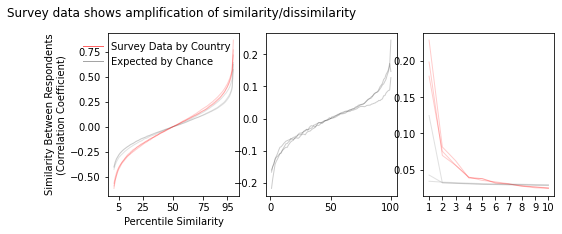

In [42]:
plt.figure(figsize=(8,3))
similarity_df2 = similarity_df - similarity_df.loc[50]
shuffle_similarity_df2 = shuffle_similarity_df - shuffle_similarity_df.loc[50]


ax1 = plt.subplot(1,3,1)
plt.plot(shuffle_similarity_df2, 'dimgrey', alpha=.2, linewidth=1)
plt.plot(similarity_df2, 'r', alpha=.2, linewidth=1)

# legend dummies
plt.plot([],[], 'r', label="Survey Data by Country", alpha=.6, linewidth=1)
plt.plot([],[], 'dimgrey', label="Expected by Chance", alpha=.6, linewidth=1)


plt.xlabel("Percentile Similarity", fontsize=10)
plt.ylabel("Similarity Between Respondents\n(Correlation Coefficient)", fontsize=10)
plt.xticks([5, 25, 50, 75, 95])
plt.legend(frameon=False)
plt.suptitle('Survey data shows amplification of similarity/dissimilarity', 
             x=-.05, y=1, ha='left', va='top', fontsize=12, color='k');


ax2 = plt.subplot(1,3,2)

effect = (similarity_df2 - shuffle_similarity_df2)
plt.plot(effect, 'k', alpha=.2, linewidth=1);
plt.legend(frameon=False)


ax3 = plt.subplot(1,3,3)
plt.plot(pca_df, 'r', alpha=.2, linewidth=1);
plt.plot(shuffle_pca_df, 'dimgrey', alpha=.2, linewidth=1);
plt.legend(frameon=False)
ax3.set_xticks(range(0,10))
ax3.set_xticklabels(range(1,11));
